In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Different models accuracy testing

In [ ]:
#reading the train file
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train.csv")

In [ ]:
df.head()

,SNO,News,Label
0,35098,(Welcome) to America We hope you enjoy our...,0
1,37968,(Welcome) to America We hope you enjoy our...,0
2,66775,Kendall Kylie Jenner Jenner NOT Upset Up...,0
3,65622,Kim Kardashian Dethroned Dethroned By Khlo...,0
4,68069,Kim Kardashian Did NOT Hot Staffer Hot Sta...,0


In [ ]:
labels=df.Label
labels.head()
df.shape

(69031, 3)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df['News'],labels, test_size=0.01, random_state=1)

In [ ]:
#Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.8)
#Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)

In [ ]:
#Initialize a PassiveAggressiveClassifier
model=PassiveAggressiveClassifier(max_iter=50)
model.fit(tfidf_train,y_train)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
#Predict on the test set and calculate accuracy 
y_pred=model.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print('Accuracy of PassiveAggressiveClassifier model:',round(score*100,2),'%')

Accuracy of PassiveAggressiveClassifier model: 90.88 %


In [ ]:
from sklearn.linear_model import LogisticRegression
#Initialize a LogisticRegression
model= LogisticRegression()

In [ ]:
model.fit(tfidf_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred=model.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print('Accuracy of LogisticRegression model:',round(score*100,2),'%')

Accuracy of LogisticRegression model: 94.5 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=20)

In [ ]:
model.fit(tfidf_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [ ]:
y_pred=model.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print('Accuracy of KNeighborsClassifier model:',round(score*100,2),'%')

Accuracy of KNeighborsClassifier model: 82.78 %


# **Graphs**

In [ ]:
df=pd.read_excel('Main source of information about news and current affairs in selected countries worldwide as of June 2020.xlsx')

In [ ]:
df

,Characteristic,Total EMEA,Argentina,Australia,Brazil,India,Nigeria,U.S.
0,Printed newspapers,0.28,0.15,0.25,0.16,0.62,0.34,0.25
1,"Online news apps,websites",0.63,0.60,0.57,0.66,0.69,0.62,0.51
2,Social media,0.55,0.59,0.59,0.71,0.82,0.78,0.54
3,Video sharing online,0.15,0.26,0.14,0.31,0.41,0.23,0.14
4,Online blogs or forums,0.13,0.13,0.10,0.15,0.35,0.39,0.13
5,Radio,0.52,0.41,0.48,0.35,0.22,0.54,0.38
6,Magazines,0.15,0.08,0.09,0.14,0.33,0.22,0.15
7,Television,0.79,0.80,0.77,0.79,0.79,0.73,0.69
8,Family & friends personally,0.37,0.34,0.36,0.43,0.46,0.38,0.36
9,Family and friens via privates messages,0.29,0.43,0.27,0.47,0.60,0.51,0.20


Text(0.5, 1.0, 'Main source of information about news and current affairs in 2020')

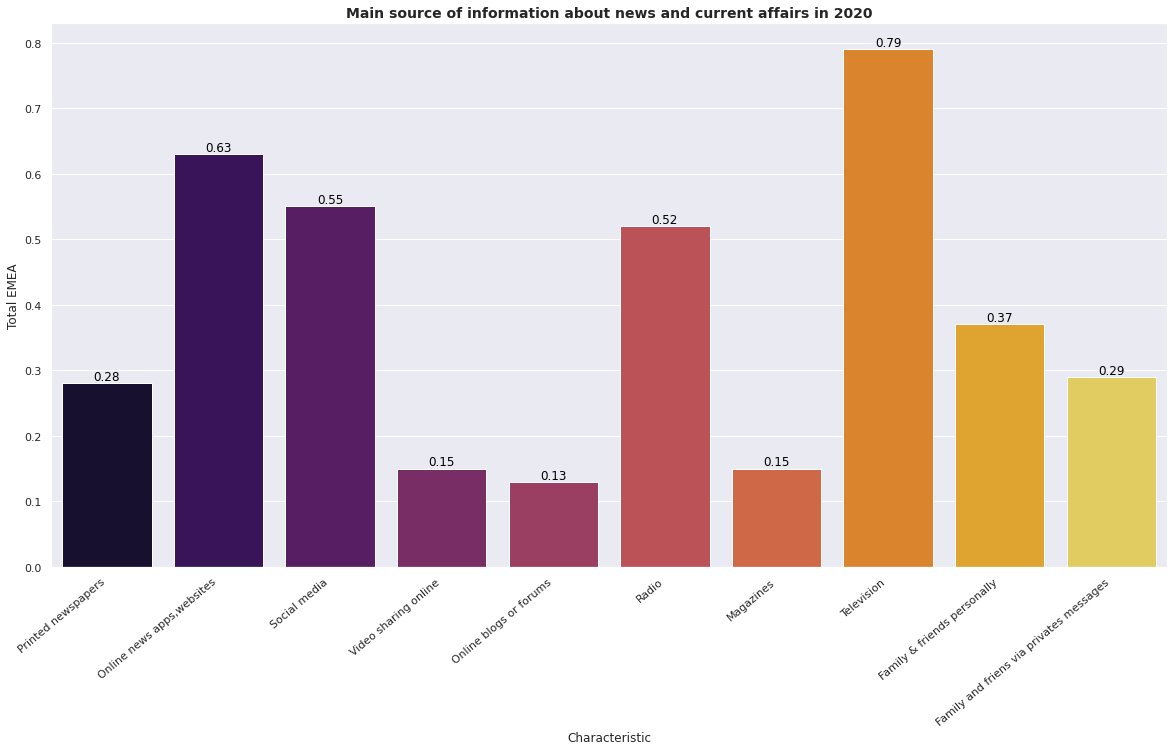

In [ ]:
sns.set_theme(style="darkgrid")
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
bar_plot3=sns.barplot(x='Characteristic',y='Total EMEA',ax=ax,data=df,palette='inferno')
bar_plot3.set_xticklabels(bar_plot3.get_xticklabels(), rotation=40, ha="right")
for p in bar_plot3.patches:
  bar_plot3.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
bar_plot3.set_xlabel=("Souce of information")
bar_plot3.set_ylabel =("%age of people using the source")
bar_plot3.set_title("Main source of information about news and current affairs in 2020",fontsize=14,fontweight='bold')
#line_plot3=sns.lineplot(x='Characteristic',y='Total EMEA',color='black',ax=ax,data=df)

Text(0.5, 1.0, 'U.S.')

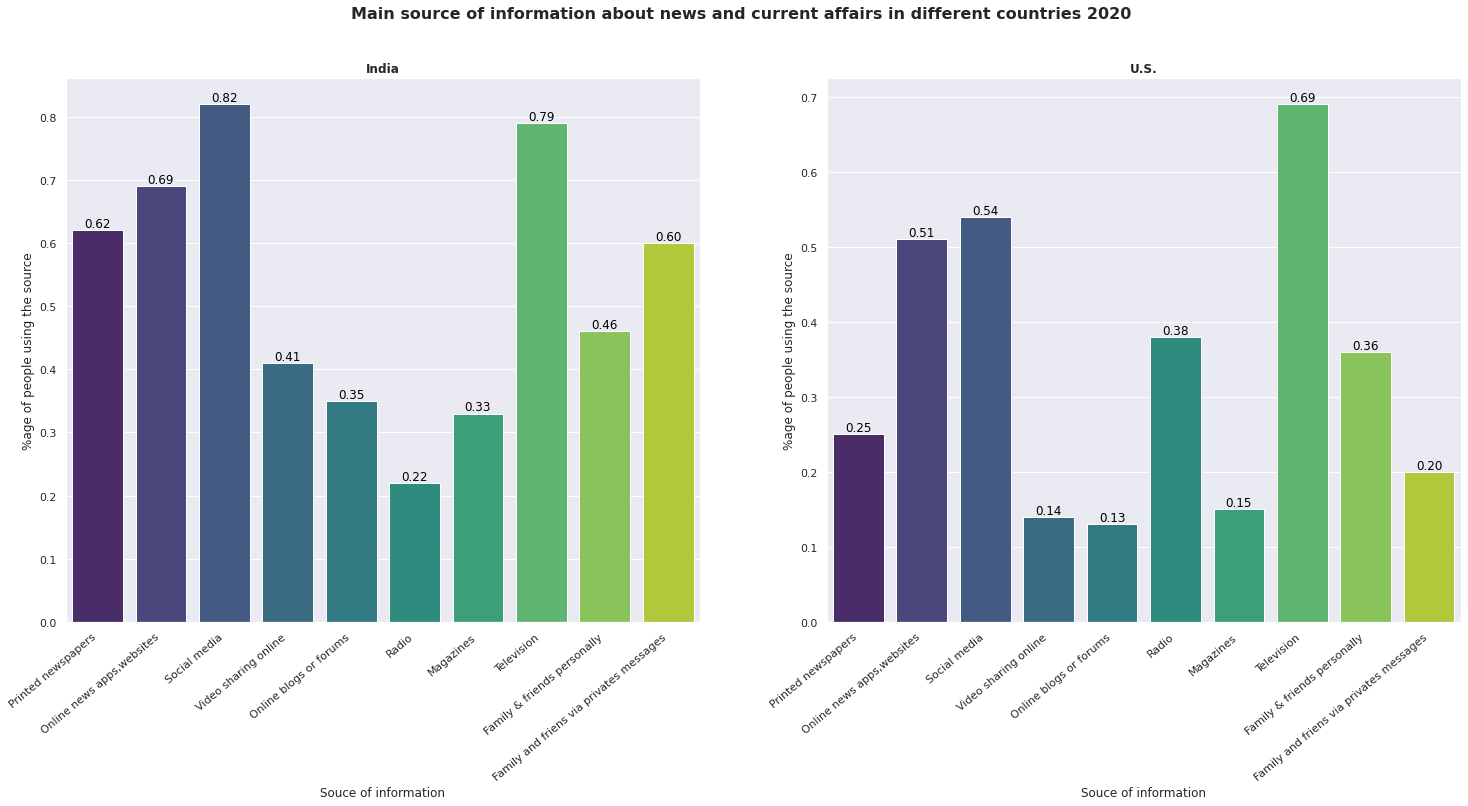

In [ ]:
sns.set_theme(style="darkgrid")
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(25,10))
fig.suptitle('Main source of information about news and current affairs in different countries 2020',fontsize=16,fontweight='bold')
bar_plot1=sns.barplot(x='Characteristic',y='India',ax=axes[0],data=df,palette='viridis')
bar_plot1.set_xticklabels(bar_plot1.get_xticklabels(), rotation=40, ha="right")
for p in bar_plot1.patches:
  bar_plot1.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
bar_plot1.set(xlabel="Souce of information", ylabel = "%age of people using the source")
bar_plot1.set_title("India",fontsize=12,fontweight='bold')
#line_plot1=sns.lineplot(x='Characteristic',y='India',color='black',ax=axes[0],data=df)

bar_plot2=sns.barplot(x='Characteristic',y='U.S.',ax=axes[1],data=df,palette='viridis')
bar_plot2.set_xticklabels(bar_plot2.get_xticklabels(), rotation=40, ha="right")
for p in bar_plot2.patches:
  bar_plot2.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
bar_plot2.set(xlabel="Souce of information", ylabel = "%age of people using the source")
bar_plot2.set_title("U.S.",fontsize=12,fontweight='bold')
#line_plot2=sns.lineplot(x='Characteristic',y='U.S.',color='black',ax=axes[1],data=df)

In [ ]:
sources=pd.read_excel('Book1.xlsx')
sources.head()

,country,Share of respondants,news source
0,India,0.62,printed newspaper
1,India,0.69,"Online news apps,websites"
2,India,0.82,social media
3,India,0.41,video sharing online
4,India,0.35,online blogs or forum


Text(0.5, 1.0, 'Main source of information about news and current affairs in selected countries worldwide as of June 2020')

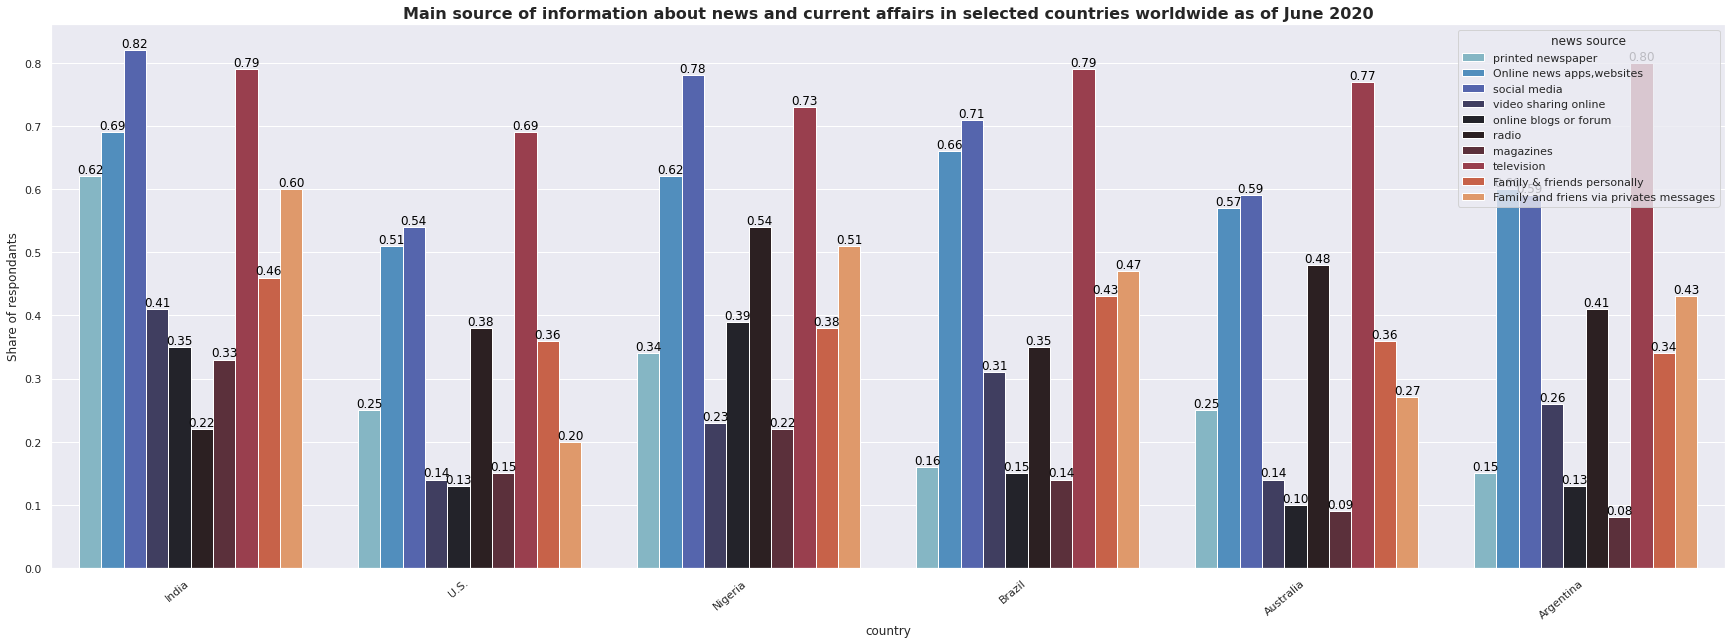

In [ ]:
sns.set_theme(style="darkgrid")
fig_dims = (30, 10)
fig, ax = plt.subplots(figsize=fig_dims)
bar_plot2 = sns.barplot( hue="news source",y="Share of respondants",x="country",ax=ax, data=sources,palette='icefire')
bar_plot2.set_xticklabels(bar_plot2.get_xticklabels(), rotation=40, ha="right")
for p in bar_plot2.patches:
  bar_plot2.text(p.get_x() + p.get_width()/2., p.get_height(), '{0:.2f}'.format(p.get_height()), 
        fontsize=12, color='black', ha='center', va='bottom')
bar_plot2.set_title("Main source of information about news and current affairs in selected countries worldwide as of June 2020",fontsize=16,fontweight='bold')

In [ ]:
level=pd.read_excel('/content/Level of difficulty differentiating between true and false information online among consumers in selected countries worldwide as of June 2020.xlsx')
level

,Characteristic,Total EMEA,Argentina,Australia,Brazil,India,Nigeria,U.S.
0,Very easy,0.03,0.08,0.05,0.09,0.18,0.20,0.07
1,Somewhat easy,0.25,0.31,0.32,0.39,0.37,0.38,0.32
2,Neither easy or difficult,0.39,0.36,0.30,0.14,0.22,0.22,0.28
3,Somewhat difficult,0.29,0.19,0.27,0.28,0.18,0.17,0.26
4,Very difficult,0.03,0.03,0.04,0.06,0.04,0.03,0.05
5,Don't know/not sure,0.01,0.03,0.02,0.03,0.01,0.01,0.02


In [ ]:
f={'fontsize':14,
 'fontweight' : 'bold',
 'color' : 'black',
 'verticalalignment': 'baseline',}

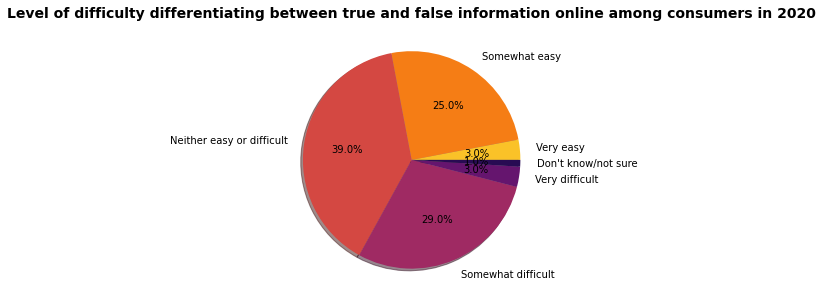

In [ ]:
EMEA=level['Total EMEA'].to_numpy()
Characteristic=level['Characteristic'].to_numpy()
current_palette = sns.color_palette(palette='inferno_r',n_colors=6)
plt.rcParams["figure.figsize"] = (20,5)
plt.pie(EMEA,labels=Characteristic,labeldistance=1.15,colors=current_palette,autopct='%1.1f%%',shadow=True)
plt.title('Level of difficulty differentiating between true and false information online among consumers in 2020',fontdict=f)
plt.show()

In [ ]:
India=level['India'].to_numpy()
US=level['U.S.'].to_numpy()
Nigeria=level['Nigeria'].to_numpy()
Brazil=level['Brazil'].to_numpy()
Australia=level['Australia'].to_numpy()
Argentina=level['Argentina'].to_numpy()
Characteristic=level['Characteristic'].to_numpy()

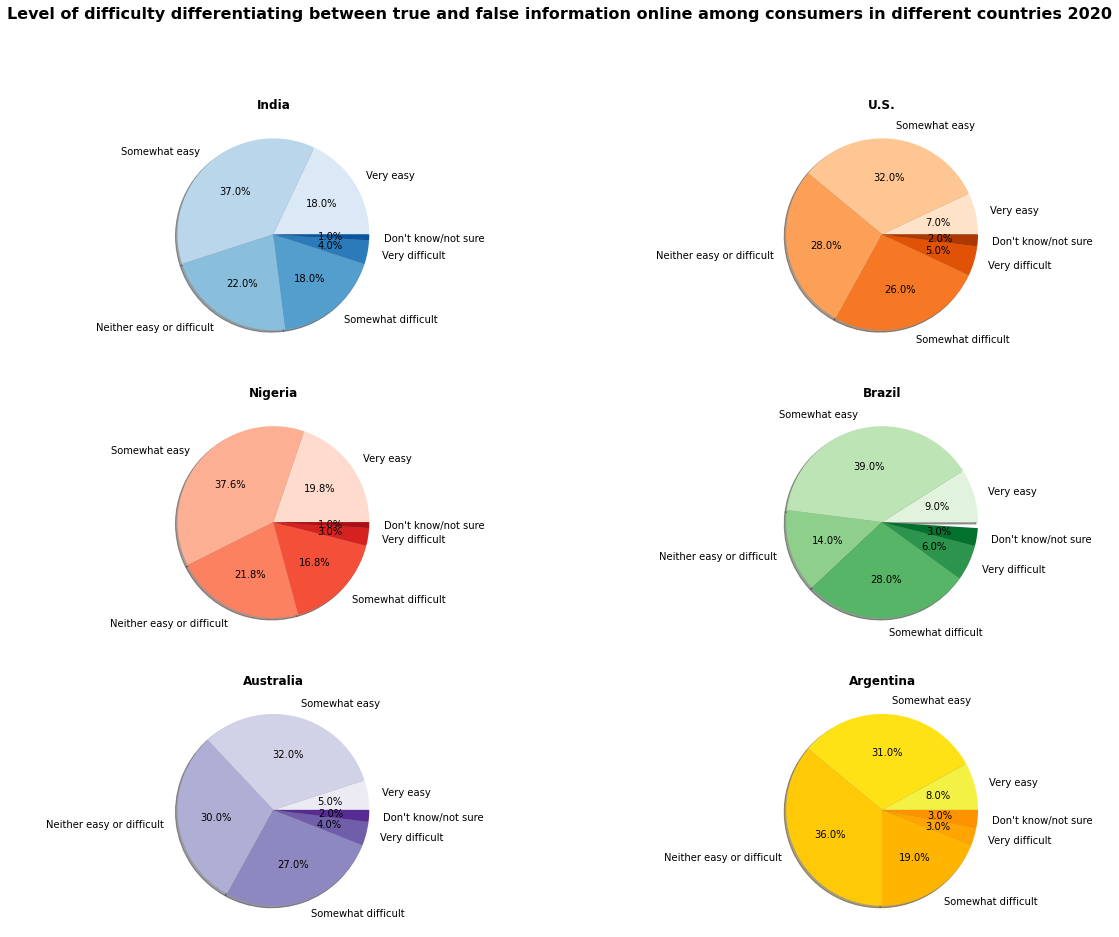

In [ ]:
fig, axs = plt.subplots(3, 2,figsize=(20,15))
fig.suptitle('Level of difficulty differentiating between true and false information online among consumers in different countries 2020',fontsize=16,fontweight='bold')

current_palette1 = sns.color_palette(palette='Blues',n_colors=6)
axs[0,0].pie(India,labels=Characteristic,labeldistance=1.15,colors=current_palette1,autopct='%1.1f%%',textprops={'color':"black"},shadow=True)
axs[0,0].set_title('India',fontsize=12,fontweight='bold')

current_palette2 = sns.color_palette(palette='Oranges',n_colors=6)
axs[0,1].pie(US,labels=Characteristic,labeldistance=1.15,colors=current_palette2,autopct='%1.1f%%',textprops={'color':"black"},shadow=True)
axs[0,1].set_title('U.S.',fontsize=12,fontweight='bold')

current_palette3 = sns.color_palette(palette='Reds',n_colors=6)
axs[1,0].pie(Nigeria,labels=Characteristic,labeldistance=1.15,colors=current_palette3,autopct='%1.1f%%',textprops={'color':"black"},shadow=True)
axs[1,0].set_title('Nigeria',fontsize=12,fontweight='bold')

current_palette4 = sns.color_palette(palette='Greens',n_colors=6)
axs[1,1].pie(Brazil,labels=Characteristic,labeldistance=1.15,colors=current_palette4,autopct='%1.1f%%',textprops={'color':"black"},shadow=True)
axs[1,1].set_title('Brazil',fontsize=12,fontweight='bold')

current_palette5 = sns.color_palette(palette='Purples',n_colors=6)
axs[2,0].pie(Australia,labels=Characteristic,labeldistance=1.15,colors=current_palette5,autopct='%1.1f%%',textprops={'color':"black"},shadow=True)
axs[2,0].set_title('Australia',fontsize=12,fontweight='bold')

current_palette6 = sns.color_palette(palette='Wistia',n_colors=6)
axs[2,1].pie(Argentina,labels=Characteristic,labeldistance=1.15,colors=current_palette6,autopct='%1.1f%%',textprops={'color':"black"},shadow=True)
axs[2,1].set_title('Argentina',fontsize=12,fontweight='bold')

plt.show()

In [ ]:
media_share = pd.read_excel("/content/Share of adults who have witnessed fake news in print media worldwide as of January 2019, by country.xlsx")
media_share.sort_values('Characteristic',inplace=True)
media_share

,Characteristic,Yes,No,I don't use this platform
18,Australia,0.37,0.41,0.22
5,Brazil,0.55,0.34,0.11
19,Canada,0.35,0.43,0.22
17,China,0.39,0.44,0.17
2,Egypt,0.60,0.26,0.14
23,France,0.31,0.45,0.24
22,Germany,0.32,0.50,0.18
20,Great Britain,0.34,0.43,0.23
16,Hong Kong,0.39,0.45,0.16
9,India,0.48,0.41,0.11


In [ ]:
tv_share=pd.read_excel("/content/Share of adults who have witnessed fake news on television worldwide as of January 2019, by country.xlsx")
tv_share.sort_values('Characteristic',inplace=True)
tv_share

,Characteristic,Yes,No,I don't use this platform
19,Australia,0.44,0.49,0.08
9,Brazil,0.57,0.35,0.07
17,Canada,0.45,0.43,0.12
21,China,0.40,0.53,0.06
2,Egypt,0.67,0.27,0.06
14,France,0.49,0.42,0.08
25,Germany,0.34,0.59,0.07
23,Great Britain,0.37,0.56,0.07
18,Hong Kong,0.44,0.50,0.05
11,India,0.53,0.43,0.05


In [ ]:
Countries=media_share['Characteristic'].to_numpy()
Yes_print=media_share['Yes'].to_numpy()
No_print=media_share['No'].to_numpy()
Plat_print=media_share["I don't use this platform"].to_numpy()
Yes_tv=tv_share['Yes'].to_numpy()
No_tv=tv_share['No'].to_numpy()
Plat_tv=tv_share["I don't use this platform"].to_numpy()
Labels=['Have witnessed','Have not witnessed',"Don't use this platform"]


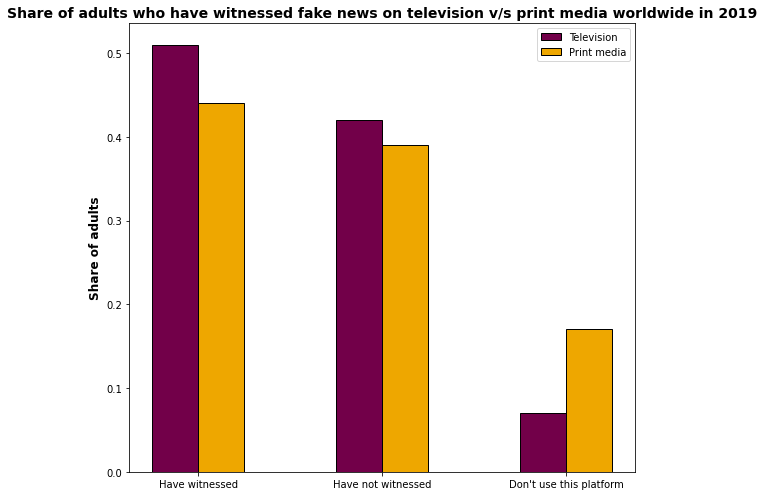

In [ ]:
width=0.25
x=np.arange(len(Labels))
tv_world=[Yes_tv[-1],No_tv[-1],Plat_tv[-1]]
print_world=[Yes_print[-1],No_print[-1],Plat_print[-1]]
fig, ax = plt.subplots(figsize=(10,7))
bar1=ax.bar(x-width/2,tv_world,width,label='Television',color='#720049',edgecolor='black')
bar2=ax.bar(x+width/2,print_world,width,label='Print media',color='#eea700',edgecolor='black')
ax.set_ylabel('Share of adults',fontsize=12,fontweight='bold')
ax.set_title('Share of adults who have witnessed fake news on television v/s print media worldwide in 2019',fontdict=f)
ax.set_xticks(x)
ax.set_xticklabels(Labels)

ax.legend()
fig.tight_layout()

plt.show()

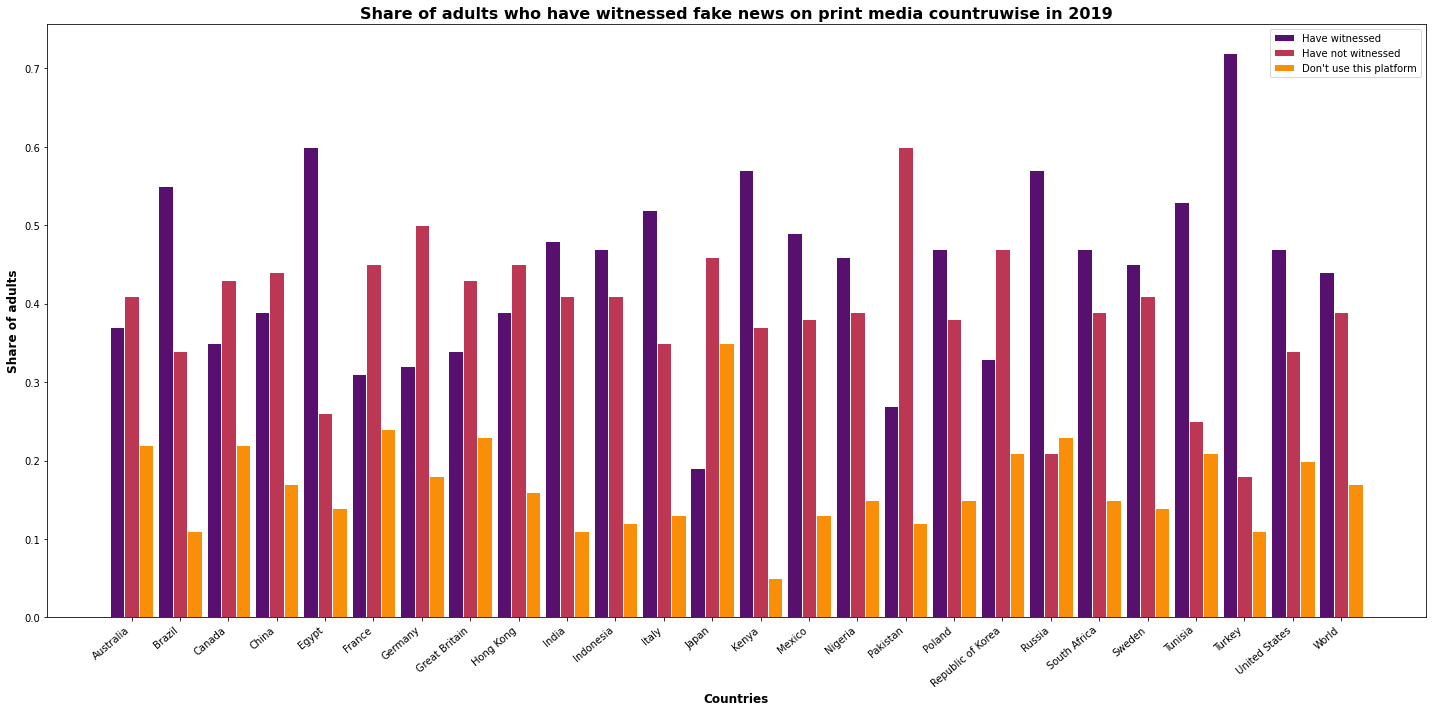

In [ ]:
f1={'fontsize':16,
 'fontweight' : 'bold',
 'color' : 'black',
 'verticalalignment': 'baseline',}
width=0.3
x=np.arange(len(Countries))
colors=sns.color_palette(palette='inferno',n_colors=3)
fig, ax = plt.subplots(figsize=(20,10))

bar1=ax.bar(x-0.3,Yes_print,width,label=Labels[0],color=colors[0],edgecolor='white')
bar2=ax.bar(x,No_print,width,label=Labels[1],color=colors[1],edgecolor='white')
bar3=ax.bar(x+0.3,Plat_print,width,label=Labels[2],color=colors[2],edgecolor='white')

ax.set_ylabel('Share of adults',fontsize=12,fontweight='bold')
ax.set_title('Share of adults who have witnessed fake news on print media countruwise in 2019',fontdict=f1)
ax.set_xticks(x)
ax.set_xticklabels(Countries,rotation=40, ha="right")
ax.set_xlabel('Countries',fontsize=12,fontweight='bold')
ax.legend()
fig.tight_layout()

plt.show()

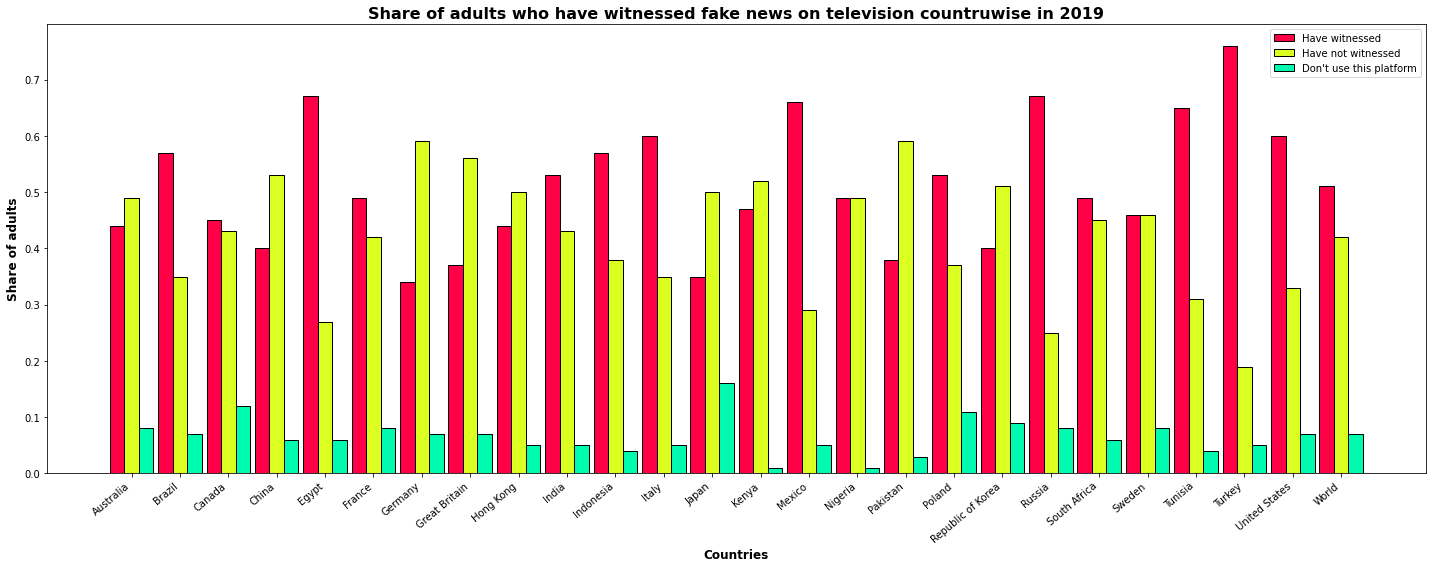

In [ ]:
width=0.3
colors=sns.color_palette(palette='gist_ncar',n_colors=3)
x=np.arange(len(Countries))
fig, ax = plt.subplots(figsize=(20,8))

bar1=ax.bar(x-0.3,Yes_tv,width,label=Labels[0],color=colors[2],edgecolor='black')
bar2=ax.bar(x,No_tv,width,label=Labels[1],color=colors[1],edgecolor='black')
bar3=ax.bar(x+0.3,Plat_tv,width,label=Labels[2],color=colors[0],edgecolor='black')

ax.set_ylabel('Share of adults',fontsize=12,fontweight='bold')
ax.set_title('Share of adults who have witnessed fake news on television countruwise in 2019',fontdict=f1)
ax.set_xticks(x)
ax.set_xticklabels(Countries,rotation=40, ha="right")
ax.set_xlabel('Countries',fontsize=12,fontweight='bold')
ax.legend()
fig.tight_layout()

plt.show()

In [ ]:
sns.color_palette(palette='Spect',n_colors=6)

ValueError: ignored

In [ ]:
sns.color_palette(palette='inferno',n_colors=3)

[(0.3415, 0.062325, 0.429425),
 (0.735683, 0.215906, 0.330245),
 (0.978422, 0.557937, 0.034931)]